In [1]:
import torch.utils
import torch.distributions
from utils import *
from models import *

root = '.'

In [2]:
torch.manual_seed(0)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
trainX, trainY, testX, testy = download_dataset()
# hidden_dim, epochs, optimizer, batch, 

# Test

In [5]:
batch_size = 32
epochs = 1
lr = 0.0002
optimizer = torch.optim.Adam
l1_weight = 0.0
weight_decay = 0.0
size_NICE = 4
model_name = 'NICE'
exp_title = 'tmp'

# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
data = get_dataloader(trainX, batch_size)
for exp_index, _ in zip(range(1), range(1)):

    model_flow = NICE(nice_size=size_NICE).to(device)
    logistic_distribution = StandardLogisticDistribution(device=device)
    optimizer = torch.optim.Adam(model_flow.parameters(), lr=lr, weight_decay=weight_decay)
    train(model_flow, data, device, epochs, optimizer, l1_weight, logistic_distribution)
    #do_exp(model_flow, data, device, lr, weight_decay, epochs, optimizer, l1_weight, logistic_distribution, batch_size, model_name, exp_title, exp_index, root)


NameError: name 'get_dataloader' is not defined

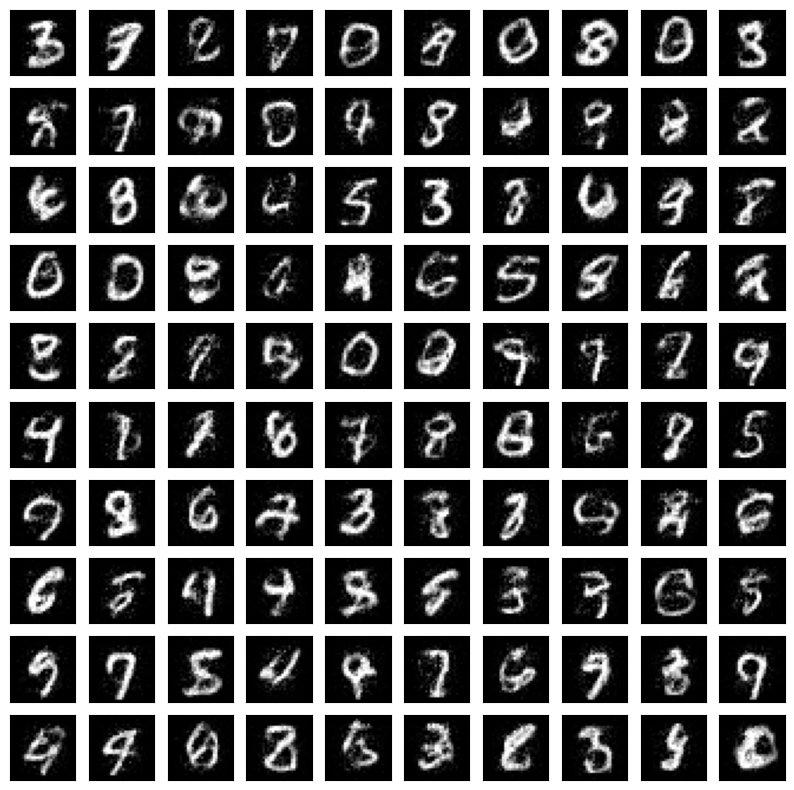

In [14]:
def plot_sample(normalizing_flow, logistic_distribution, exp_title, exp_index, model_name):
    nb_data = 10
    fig, axs = plt.subplots(nb_data, nb_data, figsize=(10, 10))
    for i in range(nb_data):
        for j in range(nb_data):
            if model_name == 'GLOW':
                x = normalizing_flow.invert().data.cpu().numpy()
            elif model_name == "NICE":
                x = normalizing_flow.invert(logistic_distribution.sample().unsqueeze(0)).data.cpu().numpy()
            axs[i, j].imshow(x.reshape(28, 28).clip(0, 1), cmap='gray')
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])
    plt.savefig(f'model_{exp_title}_{exp_index}_{model_name}.png')
    plt.show()
    
plot_sample(model_flow, logistic_distribution, exp_title, exp_index, model_name)

# Test optimizer

In [3]:
batch_size = 32
epochs = 15
lr = 0.0002
optimizers = [torch.optim.RAdam, torch.optim.NAdam, torch.optim.AdamW, torch.optim.Adam, torch.optim.RMSprop, torch.optim.Adamax]
l1_weight = 0.0
weight_decay = 0.9
size_NICE = 4
model_name = 'NICE'
exp_title = 'test_optimizer'

# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
data_train = get_dataloader(trainX, batch_size)
data_val = get_dataloader(testX, batch_size)
for exp_index, exp_optimizer in enumerate(optimizers):

    model_flow = NICE(nice_size=size_NICE).to(device)
    logistic_distribution = StandardLogisticDistribution(device=device)
    optimizer = exp_optimizer(model_flow.parameters(), lr=lr, weight_decay=weight_decay)

    do_exp(model_flow, data_train, data_val, device, lr, weight_decay, epochs, optimizer, l1_weight, logistic_distribution, batch_size, model_name, exp_title, exp_index, root)

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 17.4909, Validation: avg_loss: 93.8731


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 13.6204, Validation: avg_loss: 68.5009


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 9.2401, Validation: avg_loss: 41.9020


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 4.8797, Validation: avg_loss: 16.4004


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: 0.7176, Validation: avg_loss: -7.6152


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -3.1899, Validation: avg_loss: -30.4830


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -6.8524, Validation: avg_loss: -51.6847


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -10.2636, Validation: avg_loss: -71.3238


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -13.4062, Validation: avg_loss: -89.1960


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -16.2673, Validation: avg_loss: -105.5848


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -18.8726, Validation: avg_loss: -120.1877


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -21.2153, Validation: avg_loss: -133.1471


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -23.3153, Validation: avg_loss: -145.3469


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -25.1813, Validation: avg_loss: -155.7340


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -26.8313, Validation: avg_loss: -164.7134
Saving model 0
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 17.4192, Validation: avg_loss: 89.4257


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 12.6337, Validation: avg_loss: 61.8413


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 8.1018, Validation: avg_loss: 35.1362


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 3.7831, Validation: avg_loss: 10.1447


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -0.2990, Validation: avg_loss: -13.7279


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -4.1428, Validation: avg_loss: -35.8730


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -7.7172, Validation: avg_loss: -56.4539


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -11.0101, Validation: avg_loss: -75.3455


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -14.0227, Validation: avg_loss: -92.6194


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -16.7714, Validation: avg_loss: -108.2633


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -19.2817, Validation: avg_loss: -122.5301


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -21.5613, Validation: avg_loss: -135.3892


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -23.6233, Validation: avg_loss: -147.0416


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -25.4529, Validation: avg_loss: -157.3053


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -27.0567, Validation: avg_loss: -165.9548
Saving model 1
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 16.8915, Validation: avg_loss: 88.0738


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 13.0736, Validation: avg_loss: 69.3790


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 10.4362, Validation: avg_loss: 56.1715


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 8.5698, Validation: avg_loss: 46.8099


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: 7.2449, Validation: avg_loss: 40.1704


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: 6.3015, Validation: avg_loss: 35.4399


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: 5.6287, Validation: avg_loss: 32.0608


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: 5.1468, Validation: avg_loss: 29.6314


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: 4.8019, Validation: avg_loss: 27.8769


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: 4.5541, Validation: avg_loss: 26.6618


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: 4.3766, Validation: avg_loss: 25.7864


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: 4.2486, Validation: avg_loss: 25.1183


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: 4.1563, Validation: avg_loss: 24.6212


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: 4.0892, Validation: avg_loss: 24.2972


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: 4.0410, Validation: avg_loss: 24.0534
Saving model 2
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 16.5020, Validation: avg_loss: 83.8966


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 11.7112, Validation: avg_loss: 56.2936


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 7.1853, Validation: avg_loss: 29.8060


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 2.8946, Validation: avg_loss: 4.9054


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -1.1386, Validation: avg_loss: -18.6539


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -4.9459, Validation: avg_loss: -40.6017


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -8.4915, Validation: avg_loss: -60.9654


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -11.7509, Validation: avg_loss: -79.5815


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -14.7541, Validation: avg_loss: -96.8364


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -17.4939, Validation: avg_loss: -112.4148


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -19.9638, Validation: avg_loss: -126.2217


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -22.1767, Validation: avg_loss: -138.8403


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -24.1623, Validation: avg_loss: -150.5570


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -25.9029, Validation: avg_loss: -159.8281


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -27.4170, Validation: avg_loss: -167.7817
Saving model 3
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 15.6956, Validation: avg_loss: 79.2669


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 10.9229, Validation: avg_loss: 51.4846


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 6.4344, Validation: avg_loss: 25.4540


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 2.1782, Validation: avg_loss: 0.8297


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -1.8125, Validation: avg_loss: -22.7148


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -5.5279, Validation: avg_loss: -43.2153


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -8.9262, Validation: avg_loss: -62.6211


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -12.0200, Validation: avg_loss: -80.9365


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -14.8332, Validation: avg_loss: -96.1455


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -17.3768, Validation: avg_loss: -108.7561


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -19.6645, Validation: avg_loss: -124.6475


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -21.7158, Validation: avg_loss: -136.7553


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -23.5433, Validation: avg_loss: -146.2428


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -25.1598, Validation: avg_loss: -154.8328


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -26.5567, Validation: avg_loss: -160.9078
Saving model 4
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 17.1159, Validation: avg_loss: 87.7370


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 12.3719, Validation: avg_loss: 60.3127


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 7.8954, Validation: avg_loss: 34.2053


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 3.6553, Validation: avg_loss: 9.6191


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -0.3002, Validation: avg_loss: -13.2386


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -3.9475, Validation: avg_loss: -34.0920


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -7.2865, Validation: avg_loss: -53.1995


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -10.3240, Validation: avg_loss: -70.4920


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -13.0643, Validation: avg_loss: -85.9814


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -15.5284, Validation: avg_loss: -100.1002


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -17.7250, Validation: avg_loss: -112.5247


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -19.6649, Validation: avg_loss: -123.3944


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -21.3732, Validation: avg_loss: -132.8818


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -22.8684, Validation: avg_loss: -141.2885


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -24.1643, Validation: avg_loss: -148.1556
Saving model 5
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


# Test batch_size

In [5]:
batch_sizes = [8, 16, 32, 64, 128]
epochs = 15
lr = 0.0002
exp_optimizer = torch.optim.Adam
l1_weight = 0.00
weight_decay = 0.9
size_NICE = 4
model_name = 'NICE'
exp_title = 'test_batch'

# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE

for exp_index, batch_size in enumerate(batch_sizes):
    data_train = get_dataloader(trainX, batch_size)
    data_val = get_dataloader(testX, batch_size)
    model_flow = NICE(nice_size=size_NICE).to(device)
    logistic_distribution = StandardLogisticDistribution(device=device)
    optimizer = exp_optimizer(model_flow.parameters(), lr=lr, weight_decay=weight_decay)

    do_exp(model_flow, data_train, data_val, device, lr, weight_decay, epochs, optimizer, l1_weight, logistic_distribution, batch_size, model_name, exp_title, exp_index, root)


  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 0.6543, Validation: avg_loss: 0.9391


  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: -0.2431, Validation: avg_loss: -3.5734


  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: -0.8539, Validation: avg_loss: -6.5270


  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: -1.2450, Validation: avg_loss: -8.3226


  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -1.4633, Validation: avg_loss: -9.1773


  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -1.5527, Validation: avg_loss: -9.4932


  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -1.5890, Validation: avg_loss: -9.6570


  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -1.6115, Validation: avg_loss: -9.7568


  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -1.6273, Validation: avg_loss: -9.8628


  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -1.6396, Validation: avg_loss: -9.9217


  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -1.6491, Validation: avg_loss: -9.9653


  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -1.6569, Validation: avg_loss: -10.0182


  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -1.6628, Validation: avg_loss: -10.0370


  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -1.6681, Validation: avg_loss: -10.0706


  0%|          | 0/7500 [00:00<?, ?it/s]

  0%|          | 0/1250 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -1.6728, Validation: avg_loss: -10.1084
Saving model 0
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 3.5614, Validation: avg_loss: 14.4904


  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 1.3714, Validation: avg_loss: 2.1471


  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: -0.5498, Validation: avg_loss: -8.5795


  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: -2.1847, Validation: avg_loss: -17.4980


  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -3.5321, Validation: avg_loss: -24.8064


  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -4.6262, Validation: avg_loss: -30.6499


  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -5.5036, Validation: avg_loss: -35.3643


  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -6.1867, Validation: avg_loss: -38.9627


  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -6.6882, Validation: avg_loss: -41.3003


  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -7.0187, Validation: avg_loss: -42.9184


  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -7.2248, Validation: avg_loss: -44.0037


  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -7.3519, Validation: avg_loss: -44.6201


  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -7.4399, Validation: avg_loss: -45.1470


  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -7.5123, Validation: avg_loss: -45.4885


  0%|          | 0/3750 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -7.5751, Validation: avg_loss: -45.8373
Saving model 1
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 16.6749, Validation: avg_loss: 85.0680


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 11.9091, Validation: avg_loss: 57.4775


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 7.4013, Validation: avg_loss: 31.1078


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 3.1014, Validation: avg_loss: 5.9907


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -0.9372, Validation: avg_loss: -17.3084


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -4.6995, Validation: avg_loss: -39.1067


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -8.2284, Validation: avg_loss: -59.5542


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -11.4862, Validation: avg_loss: -78.2754


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -14.4591, Validation: avg_loss: -95.0572


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -17.1703, Validation: avg_loss: -110.4786


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -19.6344, Validation: avg_loss: -124.7804


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -21.8711, Validation: avg_loss: -137.3618


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -23.8861, Validation: avg_loss: -148.7873


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -25.6717, Validation: avg_loss: -158.8736


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -27.2379, Validation: avg_loss: -166.9760
Saving model 2
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 71.7294, Validation: avg_loss: 394.4153


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 61.3830, Validation: avg_loss: 336.1345


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 51.6851, Validation: avg_loss: 279.1160


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 42.1700, Validation: avg_loss: 223.4245


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: 32.8477, Validation: avg_loss: 168.2222


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: 23.6986, Validation: avg_loss: 114.4740


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: 14.7692, Validation: avg_loss: 62.7782


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: 6.0540, Validation: avg_loss: 11.2710


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -2.4142, Validation: avg_loss: -38.2835


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -10.6133, Validation: avg_loss: -86.4692


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -18.5638, Validation: avg_loss: -132.9294


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -26.2532, Validation: avg_loss: -176.3212


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -33.6503, Validation: avg_loss: -218.9408


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -40.7724, Validation: avg_loss: -261.5313


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -47.6009, Validation: avg_loss: -300.2885
Saving model 3
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 300.9410, Validation: avg_loss: 1693.5011


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 277.9431, Validation: avg_loss: 1572.5171


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 257.7003, Validation: avg_loss: 1455.3313


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 237.8416, Validation: avg_loss: 1339.0871


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: 218.2255, Validation: avg_loss: 1224.1362


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: 198.7784, Validation: avg_loss: 1110.4079


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: 179.4804, Validation: avg_loss: 998.0985


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: 160.3384, Validation: avg_loss: 885.6614


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: 141.3149, Validation: avg_loss: 775.3796


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: 122.4810, Validation: avg_loss: 664.0577


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: 103.7882, Validation: avg_loss: 555.5297


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: 85.2422, Validation: avg_loss: 446.4154


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: 66.9097, Validation: avg_loss: 340.3562


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: 48.7829, Validation: avg_loss: 235.8519


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: 30.8832, Validation: avg_loss: 132.1657
Saving model 4
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


# Test epochs

In [ ]:
batch_size = 32
epochses = [100,50,30,15,5]
lr = 0.0002
exp_optimizer = torch.optim.Adam
l1_weight = 0.00
weight_decay = 0.9
size_NICE = 4
model_name = 'NICE'
exp_title = 'test_epochs'

# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
data_train = get_dataloader(trainX, batch_size)
data_val = get_dataloader(testX, batch_size)
for exp_index, epochs in enumerate(epochses):

    model_flow = NICE(nice_size=size_NICE).to(device)
    logistic_distribution = StandardLogisticDistribution(device=device)
    optimizer = exp_optimizer(model_flow.parameters(), lr=lr, weight_decay=weight_decay)

    do_exp(model_flow, data_train, data_val, device, lr, weight_decay, epochs, optimizer, l1_weight, logistic_distribution, batch_size, model_name, exp_title, exp_index, root)


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/100], Train: avg_loss: 16.2336, Validation: avg_loss: 82.2806


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/100], Train: avg_loss: 11.4438, Validation: avg_loss: 54.6702


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/100], Train: avg_loss: 6.9458, Validation: avg_loss: 28.4588


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/100], Train: avg_loss: 2.6743, Validation: avg_loss: 3.6395


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/100], Train: avg_loss: -1.3679, Validation: avg_loss: -19.8951


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/100], Train: avg_loss: -5.1549, Validation: avg_loss: -41.8227


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/100], Train: avg_loss: -8.6868, Validation: avg_loss: -62.1326


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/100], Train: avg_loss: -11.9462, Validation: avg_loss: -80.8170


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/100], Train: avg_loss: -14.9106, Validation: avg_loss: -97.5614


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/100], Train: avg_loss: -17.5918, Validation: avg_loss: -112.8173


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/100], Train: avg_loss: -20.0156, Validation: avg_loss: -126.5421


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/100], Train: avg_loss: -22.1866, Validation: avg_loss: -139.0309


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/100], Train: avg_loss: -24.1174, Validation: avg_loss: -149.9913


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/100], Train: avg_loss: -25.8102, Validation: avg_loss: -158.8940


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/100], Train: avg_loss: -27.2982, Validation: avg_loss: -167.0083


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [16/100], Train: avg_loss: -28.5760, Validation: avg_loss: -174.2774


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [17/100], Train: avg_loss: -29.6465, Validation: avg_loss: -180.0488


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [18/100], Train: avg_loss: -30.5161, Validation: avg_loss: -184.4736


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [19/100], Train: avg_loss: -31.2113, Validation: avg_loss: -188.4896


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [20/100], Train: avg_loss: -31.7433, Validation: avg_loss: -190.9121


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [21/100], Train: avg_loss: -32.1431, Validation: avg_loss: -193.2679


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [22/100], Train: avg_loss: -32.4613, Validation: avg_loss: -195.2715


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [23/100], Train: avg_loss: -32.7287, Validation: avg_loss: -195.5447


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [24/100], Train: avg_loss: -32.9476, Validation: avg_loss: -197.0317


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [25/100], Train: avg_loss: -33.1277, Validation: avg_loss: -198.3719


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [26/100], Train: avg_loss: -33.3053, Validation: avg_loss: -198.8470


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [27/100], Train: avg_loss: -33.4610, Validation: avg_loss: -199.5664


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [28/100], Train: avg_loss: -33.6137, Validation: avg_loss: -200.9883


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [29/100], Train: avg_loss: -33.7489, Validation: avg_loss: -201.3160


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [30/100], Train: avg_loss: -33.8575, Validation: avg_loss: -201.9282


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [31/100], Train: avg_loss: -33.9830, Validation: avg_loss: -202.0159


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [32/100], Train: avg_loss: -34.0896, Validation: avg_loss: -203.6744


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [33/100], Train: avg_loss: -34.1834, Validation: avg_loss: -202.7625


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [34/100], Train: avg_loss: -34.2823, Validation: avg_loss: -203.6339


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [35/100], Train: avg_loss: -34.3671, Validation: avg_loss: -204.1634


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [36/100], Train: avg_loss: -34.4399, Validation: avg_loss: -204.6761


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [37/100], Train: avg_loss: -34.5214, Validation: avg_loss: -204.7956


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [38/100], Train: avg_loss: -34.6017, Validation: avg_loss: -205.0258


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [39/100], Train: avg_loss: -34.6603, Validation: avg_loss: -205.2661


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [40/100], Train: avg_loss: -34.7320, Validation: avg_loss: -206.0357


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [41/100], Train: avg_loss: -34.8033, Validation: avg_loss: -206.4682


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [42/100], Train: avg_loss: -34.8668, Validation: avg_loss: -206.4509


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [43/100], Train: avg_loss: -34.9261, Validation: avg_loss: -206.8995


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [44/100], Train: avg_loss: -34.9855, Validation: avg_loss: -206.9413


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [45/100], Train: avg_loss: -35.0375, Validation: avg_loss: -207.2655


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [46/100], Train: avg_loss: -35.0932, Validation: avg_loss: -207.6377


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [47/100], Train: avg_loss: -35.1496, Validation: avg_loss: -207.5802


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [48/100], Train: avg_loss: -35.1992, Validation: avg_loss: -208.2024


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [49/100], Train: avg_loss: -35.2519, Validation: avg_loss: -208.1444


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [50/100], Train: avg_loss: -35.2897, Validation: avg_loss: -208.4812


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [51/100], Train: avg_loss: -35.3485, Validation: avg_loss: -208.5147


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [52/100], Train: avg_loss: -35.3948, Validation: avg_loss: -208.8349


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [53/100], Train: avg_loss: -35.4484, Validation: avg_loss: -209.4542


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [54/100], Train: avg_loss: -35.4972, Validation: avg_loss: -209.2040


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [55/100], Train: avg_loss: -35.5396, Validation: avg_loss: -208.8003


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [56/100], Train: avg_loss: -35.5839, Validation: avg_loss: -209.1798


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [57/100], Train: avg_loss: -35.6224, Validation: avg_loss: -210.1024


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [58/100], Train: avg_loss: -35.6611, Validation: avg_loss: -209.8369


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [59/100], Train: avg_loss: -35.7136, Validation: avg_loss: -210.2345


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [60/100], Train: avg_loss: -35.7426, Validation: avg_loss: -210.8914


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [61/100], Train: avg_loss: -35.7744, Validation: avg_loss: -210.2344


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [62/100], Train: avg_loss: -35.8169, Validation: avg_loss: -210.3304


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [63/100], Train: avg_loss: -35.8553, Validation: avg_loss: -210.5257


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [64/100], Train: avg_loss: -35.8841, Validation: avg_loss: -211.1395


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [65/100], Train: avg_loss: -35.9188, Validation: avg_loss: -210.3619


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [66/100], Train: avg_loss: -35.9490, Validation: avg_loss: -210.3958


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [67/100], Train: avg_loss: -35.9817, Validation: avg_loss: -210.5237


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [68/100], Train: avg_loss: -36.0234, Validation: avg_loss: -211.1585


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [69/100], Train: avg_loss: -36.0402, Validation: avg_loss: -211.4936


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [70/100], Train: avg_loss: -36.0713, Validation: avg_loss: -211.6273


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [71/100], Train: avg_loss: -36.1096, Validation: avg_loss: -211.7498


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [72/100], Train: avg_loss: -36.1346, Validation: avg_loss: -211.4384


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [73/100], Train: avg_loss: -36.1612, Validation: avg_loss: -211.5872


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [74/100], Train: avg_loss: -36.1993, Validation: avg_loss: -212.1465


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [75/100], Train: avg_loss: -36.2167, Validation: avg_loss: -211.8286


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [76/100], Train: avg_loss: -36.2402, Validation: avg_loss: -212.1374


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [77/100], Train: avg_loss: -36.2682, Validation: avg_loss: -211.7652


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [78/100], Train: avg_loss: -36.3007, Validation: avg_loss: -212.2171


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [79/100], Train: avg_loss: -36.3246, Validation: avg_loss: -212.3781


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [80/100], Train: avg_loss: -36.3491, Validation: avg_loss: -212.1889


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [81/100], Train: avg_loss: -36.3788, Validation: avg_loss: -212.6736


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [82/100], Train: avg_loss: -36.3955, Validation: avg_loss: -212.7330


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [83/100], Train: avg_loss: -36.4115, Validation: avg_loss: -212.8717


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [84/100], Train: avg_loss: -36.4441, Validation: avg_loss: -212.8010


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [85/100], Train: avg_loss: -36.4660, Validation: avg_loss: -212.8395


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [86/100], Train: avg_loss: -36.4908, Validation: avg_loss: -212.3722


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [87/100], Train: avg_loss: -36.5122, Validation: avg_loss: -213.2301


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [88/100], Train: avg_loss: -36.5280, Validation: avg_loss: -213.1448


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [89/100], Train: avg_loss: -36.5457, Validation: avg_loss: -213.3523


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [90/100], Train: avg_loss: -36.5718, Validation: avg_loss: -213.8725


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [91/100], Train: avg_loss: -36.5926, Validation: avg_loss: -213.1898


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [92/100], Train: avg_loss: -36.6119, Validation: avg_loss: -213.6688


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [93/100], Train: avg_loss: -36.6347, Validation: avg_loss: -213.2641


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [94/100], Train: avg_loss: -36.6547, Validation: avg_loss: -213.6304


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [95/100], Train: avg_loss: -36.6719, Validation: avg_loss: -214.0724


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [96/100], Train: avg_loss: -36.6889, Validation: avg_loss: -214.0440


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [97/100], Train: avg_loss: -36.7141, Validation: avg_loss: -213.2218


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [98/100], Train: avg_loss: -36.7287, Validation: avg_loss: -214.0971


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [99/100], Train: avg_loss: -36.7590, Validation: avg_loss: -213.8992


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [100/100], Train: avg_loss: -36.7789, Validation: avg_loss: -213.6390
Saving model 0
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/50], Train: avg_loss: 16.2441, Validation: avg_loss: 82.3968


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/50], Train: avg_loss: 11.4587, Validation: avg_loss: 54.8448


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/50], Train: avg_loss: 6.9544, Validation: avg_loss: 28.4526


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/50], Train: avg_loss: 2.6666, Validation: avg_loss: 3.3180


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/50], Train: avg_loss: -1.3940, Validation: avg_loss: -20.1291


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/50], Train: avg_loss: -5.1819, Validation: avg_loss: -42.0887


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/50], Train: avg_loss: -8.6906, Validation: avg_loss: -61.9987


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/50], Train: avg_loss: -11.9251, Validation: avg_loss: -80.6496


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/50], Train: avg_loss: -14.9105, Validation: avg_loss: -97.9665


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/50], Train: avg_loss: -17.6497, Validation: avg_loss: -113.5854


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/50], Train: avg_loss: -20.1123, Validation: avg_loss: -127.3268


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/50], Train: avg_loss: -22.3156, Validation: avg_loss: -139.8852


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/50], Train: avg_loss: -24.2837, Validation: avg_loss: -150.8135


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/50], Train: avg_loss: -26.0110, Validation: avg_loss: -160.5387


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/50], Train: avg_loss: -27.5154, Validation: avg_loss: -168.6132


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [16/50], Train: avg_loss: -28.8041, Validation: avg_loss: -175.7754


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [17/50], Train: avg_loss: -29.8669, Validation: avg_loss: -181.6998


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [18/50], Train: avg_loss: -30.7352, Validation: avg_loss: -185.8993


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [19/50], Train: avg_loss: -31.4218, Validation: avg_loss: -189.7597


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [20/50], Train: avg_loss: -31.9411, Validation: avg_loss: -191.9381


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [21/50], Train: avg_loss: -32.3484, Validation: avg_loss: -194.0737


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [22/50], Train: avg_loss: -32.6509, Validation: avg_loss: -195.9384


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [23/50], Train: avg_loss: -32.9144, Validation: avg_loss: -196.7252


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [24/50], Train: avg_loss: -33.1349, Validation: avg_loss: -198.5573


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [25/50], Train: avg_loss: -33.3163, Validation: avg_loss: -198.9309


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [26/50], Train: avg_loss: -33.4745, Validation: avg_loss: -199.6077


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [27/50], Train: avg_loss: -33.6188, Validation: avg_loss: -201.0874


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [28/50], Train: avg_loss: -33.7596, Validation: avg_loss: -201.3394


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [29/50], Train: avg_loss: -33.8764, Validation: avg_loss: -201.9368


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [30/50], Train: avg_loss: -33.9921, Validation: avg_loss: -202.8889


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [31/50], Train: avg_loss: -34.1004, Validation: avg_loss: -203.3383


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [32/50], Train: avg_loss: -34.2003, Validation: avg_loss: -203.3615


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [33/50], Train: avg_loss: -34.2978, Validation: avg_loss: -203.7944


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [34/50], Train: avg_loss: -34.3951, Validation: avg_loss: -204.5130


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [35/50], Train: avg_loss: -34.4780, Validation: avg_loss: -204.3097


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [36/50], Train: avg_loss: -34.5579, Validation: avg_loss: -205.2196


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [37/50], Train: avg_loss: -34.6420, Validation: avg_loss: -204.7927


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [38/50], Train: avg_loss: -34.7190, Validation: avg_loss: -206.1720


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [39/50], Train: avg_loss: -34.7856, Validation: avg_loss: -205.9848


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [40/50], Train: avg_loss: -34.8552, Validation: avg_loss: -206.3772


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [41/50], Train: avg_loss: -34.9343, Validation: avg_loss: -206.5252


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [42/50], Train: avg_loss: -34.9913, Validation: avg_loss: -207.1861


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [43/50], Train: avg_loss: -35.0575, Validation: avg_loss: -207.0997


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [44/50], Train: avg_loss: -35.1163, Validation: avg_loss: -207.5727


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [45/50], Train: avg_loss: -35.1675, Validation: avg_loss: -208.1471


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [46/50], Train: avg_loss: -35.2421, Validation: avg_loss: -207.2190


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [47/50], Train: avg_loss: -35.2731, Validation: avg_loss: -208.4629


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [48/50], Train: avg_loss: -35.3417, Validation: avg_loss: -208.7323


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [49/50], Train: avg_loss: -35.3829, Validation: avg_loss: -208.1030


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [50/50], Train: avg_loss: -35.4411, Validation: avg_loss: -208.6149
Saving model 1
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/30], Train: avg_loss: 16.4859, Validation: avg_loss: 83.7367


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/30], Train: avg_loss: 11.6752, Validation: avg_loss: 56.0620


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/30], Train: avg_loss: 7.1502, Validation: avg_loss: 29.5693


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/30], Train: avg_loss: 2.8551, Validation: avg_loss: 4.6767


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/30], Train: avg_loss: -1.1736, Validation: avg_loss: -18.7500


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/30], Train: avg_loss: -4.9329, Validation: avg_loss: -40.4514


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/30], Train: avg_loss: -8.4185, Validation: avg_loss: -60.3974


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/30], Train: avg_loss: -11.6290, Validation: avg_loss: -78.7171


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/30], Train: avg_loss: -14.5586, Validation: avg_loss: -95.2718


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/30], Train: avg_loss: -17.2312, Validation: avg_loss: -110.6342


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/30], Train: avg_loss: -19.6717, Validation: avg_loss: -124.4840


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/30], Train: avg_loss: -21.8756, Validation: avg_loss: -137.1909


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/30], Train: avg_loss: -23.8360, Validation: avg_loss: -148.2237


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/30], Train: avg_loss: -25.5770, Validation: avg_loss: -157.9752


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/30], Train: avg_loss: -27.0920, Validation: avg_loss: -166.1075


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [16/30], Train: avg_loss: -28.3883, Validation: avg_loss: -172.9240


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [17/30], Train: avg_loss: -29.4813, Validation: avg_loss: -178.8573


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [18/30], Train: avg_loss: -30.3761, Validation: avg_loss: -183.9970


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [19/30], Train: avg_loss: -31.0955, Validation: avg_loss: -187.5718


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [20/30], Train: avg_loss: -31.6598, Validation: avg_loss: -190.0752


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [21/30], Train: avg_loss: -32.0907, Validation: avg_loss: -193.1046


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [22/30], Train: avg_loss: -32.4351, Validation: avg_loss: -194.5609


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [23/30], Train: avg_loss: -32.6963, Validation: avg_loss: -195.8759


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [24/30], Train: avg_loss: -32.9185, Validation: avg_loss: -196.7533


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [25/30], Train: avg_loss: -33.1086, Validation: avg_loss: -197.8725


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [26/30], Train: avg_loss: -33.2719, Validation: avg_loss: -198.8939


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [27/30], Train: avg_loss: -33.4105, Validation: avg_loss: -199.1915


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [28/30], Train: avg_loss: -33.5521, Validation: avg_loss: -200.1158


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [29/30], Train: avg_loss: -33.6776, Validation: avg_loss: -201.2175


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [30/30], Train: avg_loss: -33.7839, Validation: avg_loss: -201.3023
Saving model 2
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 16.6930, Validation: avg_loss: 85.1755


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 11.9215, Validation: avg_loss: 57.6070


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 7.4117, Validation: avg_loss: 31.2751


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 3.1356, Validation: avg_loss: 6.4225


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -0.8970, Validation: avg_loss: -17.1122


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -4.6876, Validation: avg_loss: -38.9933


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -8.1913, Validation: avg_loss: -59.1327


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -11.4137, Validation: avg_loss: -77.5322


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -14.3474, Validation: avg_loss: -94.4283


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -17.0318, Validation: avg_loss: -109.6252


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -19.4628, Validation: avg_loss: -123.3530


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -21.6602, Validation: avg_loss: -135.8057


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -23.6364, Validation: avg_loss: -147.1249


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -25.3858, Validation: avg_loss: -156.6048


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -26.9042, Validation: avg_loss: -165.0058
Saving model 3
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/5], Train: avg_loss: 16.5037, Validation: avg_loss: 83.9165


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/5], Train: avg_loss: 11.7017, Validation: avg_loss: 56.1620


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/5], Train: avg_loss: 7.1816, Validation: avg_loss: 29.7953


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/5], Train: avg_loss: 2.8940, Validation: avg_loss: 4.9354


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/5], Train: avg_loss: -1.1501, Validation: avg_loss: -18.5995
Saving model 4
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


# Test lr

In [4]:
batch_size = 32
epochs = 15
lrs = [0.00005, 0.0002, 0.001, 0.01]
exp_optimizer = torch.optim.Adam
l1_weight = 0.00
weight_decay = 0.9
size_NICE = 4
model_name = 'NICE'
exp_title = 'test_lr'

# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
data_train = get_dataloader(trainX, batch_size)
data_val = get_dataloader(testX, batch_size)
for exp_index, lr in enumerate(lrs):

    model_flow = NICE(nice_size=size_NICE).to(device)
    logistic_distribution = StandardLogisticDistribution(device=device)
    optimizer = exp_optimizer(model_flow.parameters(), lr=lr, weight_decay=weight_decay)

    do_exp(model_flow, data_train, data_val, device, lr, weight_decay, epochs, optimizer, l1_weight, logistic_distribution, batch_size, model_name, exp_title, exp_index, root)


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 18.4390, Validation: avg_loss: 105.9798


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 17.0979, Validation: avg_loss: 98.5278


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 15.8651, Validation: avg_loss: 91.2429


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 14.6499, Validation: avg_loss: 83.9596


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: 13.4444, Validation: avg_loss: 76.7501


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: 12.2491, Validation: avg_loss: 69.6955


  0%|          | 0/1875 [00:00<?, ?it/s]

# Test l1

In [4]:
batch_size = 32
epochs = 15
lr = 0.0002
exp_optimizer = torch.optim.Adam
l1_weights = [0.1, 1, 10]
weight_decays = [0.1, 0.9, 3]
size_NICE = 4
model_name = 'NICE'
exp_title = 'test_l1'

# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
data_train = get_dataloader(trainX, batch_size)
data_val = get_dataloader(testX, batch_size)
for exp_index, regularization_weight in enumerate(l1_weights+weight_decays):

    model_flow = NICE(nice_size=size_NICE).to(device)
    logistic_distribution = StandardLogisticDistribution(device=device)
    if exp_index < len(l1_weights):
        optimizer = exp_optimizer(model_flow.parameters(), lr=lr, weight_decay=0.0)
        do_exp(model_flow, data_train, data_val, device, lr, 0, epochs, optimizer, regularization_weight, logistic_distribution, batch_size, model_name, exp_title, exp_index, root)
    else:
        optimizer = exp_optimizer(model_flow.parameters(), lr=lr, weight_decay=regularization_weight)
        do_exp(model_flow, data_train, data_val, device, lr, regularization_weight, epochs, optimizer, 0, logistic_distribution, batch_size, model_name, exp_title, exp_index, root)


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 17.1769, Validation: avg_loss: 87.5106


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 12.2061, Validation: avg_loss: 58.5747


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 7.4359, Validation: avg_loss: 30.5504


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 2.8441, Validation: avg_loss: 3.9256


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -1.5187, Validation: avg_loss: -21.2661


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -5.5982, Validation: avg_loss: -44.5346


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -9.3550, Validation: avg_loss: -65.6419


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -12.7775, Validation: avg_loss: -84.6645


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -15.8532, Validation: avg_loss: -101.6487


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -18.6196, Validation: avg_loss: -117.0968


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -21.0851, Validation: avg_loss: -130.6464


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -23.2922, Validation: avg_loss: -142.3779


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -25.2524, Validation: avg_loss: -153.0471


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -26.9675, Validation: avg_loss: -162.5541


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -28.4791, Validation: avg_loss: -170.2014
Saving model 0
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 17.1998, Validation: avg_loss: 87.6439


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 12.2245, Validation: avg_loss: 58.6775


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 7.4572, Validation: avg_loss: 30.8129


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 2.8674, Validation: avg_loss: 4.0005


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -1.4978, Validation: avg_loss: -21.1434


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -5.5809, Validation: avg_loss: -44.2621


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -9.3428, Validation: avg_loss: -65.5316


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -12.7673, Validation: avg_loss: -84.6998


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -15.8531, Validation: avg_loss: -101.6910


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -18.6069, Validation: avg_loss: -116.7996


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -21.0699, Validation: avg_loss: -130.6212


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -23.2604, Validation: avg_loss: -142.3702


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -25.2065, Validation: avg_loss: -152.6932


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -26.9318, Validation: avg_loss: -162.3530


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -28.4373, Validation: avg_loss: -170.5778
Saving model 1
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 16.1504, Validation: avg_loss: 81.2656


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 11.1672, Validation: avg_loss: 52.4601


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 6.4414, Validation: avg_loss: 24.9031


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 1.9122, Validation: avg_loss: -1.4557


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -2.3825, Validation: avg_loss: -26.1863


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -6.4043, Validation: avg_loss: -49.1404


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -10.1222, Validation: avg_loss: -70.2690


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -13.5149, Validation: avg_loss: -89.0967


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -16.5788, Validation: avg_loss: -106.0070


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -19.3247, Validation: avg_loss: -121.1503


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -21.7720, Validation: avg_loss: -134.8450


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -23.9497, Validation: avg_loss: -146.5318


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -25.8820, Validation: avg_loss: -157.0587


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -27.5719, Validation: avg_loss: -166.1947


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -29.0265, Validation: avg_loss: -173.5792
Saving model 2
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 15.7581, Validation: avg_loss: 78.8836


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 10.7890, Validation: avg_loss: 50.3265


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 6.1182, Validation: avg_loss: 23.0553


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 1.6676, Validation: avg_loss: -2.8585


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -2.5249, Validation: avg_loss: -26.8043


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -6.4213, Validation: avg_loss: -49.0714


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -10.0083, Validation: avg_loss: -69.5915


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -13.2796, Validation: avg_loss: -87.8198


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -16.2442, Validation: avg_loss: -104.9193


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -18.9253, Validation: avg_loss: -119.9855


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -21.3373, Validation: avg_loss: -133.4777


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -23.5080, Validation: avg_loss: -145.7724


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -25.4323, Validation: avg_loss: -155.9873


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -27.1327, Validation: avg_loss: -165.2834


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -28.5944, Validation: avg_loss: -173.6105
Saving model 3
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 16.3099, Validation: avg_loss: 82.8156


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 11.5433, Validation: avg_loss: 55.3385


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 7.0607, Validation: avg_loss: 29.1724


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 2.8014, Validation: avg_loss: 4.4301


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -1.1984, Validation: avg_loss: -18.7674


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -4.9193, Validation: avg_loss: -40.2348


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -8.3821, Validation: avg_loss: -60.0470


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -11.5904, Validation: avg_loss: -78.3769


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -14.5388, Validation: avg_loss: -95.2148


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -17.2351, Validation: avg_loss: -110.7983


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -19.6899, Validation: avg_loss: -124.9347


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -21.9188, Validation: avg_loss: -137.6531


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -23.9168, Validation: avg_loss: -148.2776


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -25.6698, Validation: avg_loss: -158.3087


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -27.2035, Validation: avg_loss: -166.9994
Saving model 4
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 17.3645, Validation: avg_loss: 89.9747


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 12.8538, Validation: avg_loss: 63.8151


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 8.6042, Validation: avg_loss: 39.1931


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 4.6220, Validation: avg_loss: 16.1440


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: 0.9106, Validation: avg_loss: -5.3711


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -2.5553, Validation: avg_loss: -25.2099


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -5.7178, Validation: avg_loss: -43.3517


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -8.6675, Validation: avg_loss: -60.3924


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -11.3402, Validation: avg_loss: -75.4326


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -13.7157, Validation: avg_loss: -88.9467


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -15.8494, Validation: avg_loss: -101.2950


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -17.7767, Validation: avg_loss: -112.0972


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -19.5199, Validation: avg_loss: -122.0481


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -21.0847, Validation: avg_loss: -131.2432


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -22.4820, Validation: avg_loss: -138.7993
Saving model 5
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


# Test NICE size

In [9]:
batch_size = 32
epochs = 30
lr = 0.0002
exp_optimizer = torch.optim.Adam
l1_weight = 0.00
weight_decay = 0.9
size_NICEs = [1, 2, 4, 8, 16]
model_name = 'NICE'
exp_title = 'test_NICEsize'

# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
data_train = get_dataloader(trainX, batch_size)
data_val = get_dataloader(testX, batch_size)
for exp_index, size_NICE in enumerate(size_NICEs):

    model_flow = NICE(nice_size=size_NICE).to(device)
    logistic_distribution = StandardLogisticDistribution(device=device)
    optimizer = exp_optimizer(model_flow.parameters(), lr=lr, weight_decay=weight_decay)

    do_exp(model_flow, data_train, data_val, device, lr, weight_decay, epochs, optimizer, l1_weight, logistic_distribution, batch_size, model_name, exp_title, exp_index, root)


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/30], Train: avg_loss: 17.4278, Validation: avg_loss: 90.5948


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/30], Train: avg_loss: 12.9475, Validation: avg_loss: 64.7279


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/30], Train: avg_loss: 8.7523, Validation: avg_loss: 40.3454


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/30], Train: avg_loss: 4.8098, Validation: avg_loss: 17.5874


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/30], Train: avg_loss: 1.1320, Validation: avg_loss: -3.6760


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/30], Train: avg_loss: -2.2951, Validation: avg_loss: -23.5007


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/30], Train: avg_loss: -5.4807, Validation: avg_loss: -41.8387


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/30], Train: avg_loss: -8.4366, Validation: avg_loss: -58.7713


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/30], Train: avg_loss: -11.1581, Validation: avg_loss: -74.5284


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/30], Train: avg_loss: -13.6538, Validation: avg_loss: -88.7955


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/30], Train: avg_loss: -15.9392, Validation: avg_loss: -102.0299


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/30], Train: avg_loss: -18.0223, Validation: avg_loss: -113.9071


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/30], Train: avg_loss: -19.9057, Validation: avg_loss: -124.3770


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/30], Train: avg_loss: -21.5778, Validation: avg_loss: -133.8115


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/30], Train: avg_loss: -23.0391, Validation: avg_loss: -141.9216


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [16/30], Train: avg_loss: -24.2844, Validation: avg_loss: -148.2370


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [17/30], Train: avg_loss: -25.3006, Validation: avg_loss: -153.9731


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [18/30], Train: avg_loss: -26.1047, Validation: avg_loss: -157.8150


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [19/30], Train: avg_loss: -26.7285, Validation: avg_loss: -161.2023


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [20/30], Train: avg_loss: -27.1954, Validation: avg_loss: -163.7218


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [21/30], Train: avg_loss: -27.5429, Validation: avg_loss: -165.3224


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [22/30], Train: avg_loss: -27.7970, Validation: avg_loss: -166.4174


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [23/30], Train: avg_loss: -27.9804, Validation: avg_loss: -167.5287


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [24/30], Train: avg_loss: -28.1216, Validation: avg_loss: -168.0131


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [25/30], Train: avg_loss: -28.2425, Validation: avg_loss: -168.8863


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [26/30], Train: avg_loss: -28.3382, Validation: avg_loss: -169.0181


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [27/30], Train: avg_loss: -28.4156, Validation: avg_loss: -169.4280


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [28/30], Train: avg_loss: -28.4887, Validation: avg_loss: -169.8692


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [29/30], Train: avg_loss: -28.5572, Validation: avg_loss: -169.9815


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [30/30], Train: avg_loss: -28.6187, Validation: avg_loss: -170.2400
Saving model 0
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/30], Train: avg_loss: 16.7222, Validation: avg_loss: 85.2509


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/30], Train: avg_loss: 11.9387, Validation: avg_loss: 57.6124


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/30], Train: avg_loss: 7.4257, Validation: avg_loss: 31.1725


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/30], Train: avg_loss: 3.1298, Validation: avg_loss: 6.1422


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/30], Train: avg_loss: -0.9403, Validation: avg_loss: -17.3743


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/30], Train: avg_loss: -4.7638, Validation: avg_loss: -39.5134


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/30], Train: avg_loss: -8.3071, Validation: avg_loss: -59.7614


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/30], Train: avg_loss: -11.5736, Validation: avg_loss: -78.4786


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/30], Train: avg_loss: -14.5723, Validation: avg_loss: -95.8420


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/30], Train: avg_loss: -17.2778, Validation: avg_loss: -110.9139


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/30], Train: avg_loss: -19.7141, Validation: avg_loss: -124.6107


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/30], Train: avg_loss: -21.8944, Validation: avg_loss: -136.7795


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/30], Train: avg_loss: -23.8348, Validation: avg_loss: -147.9329


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/30], Train: avg_loss: -25.5482, Validation: avg_loss: -157.8267


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/30], Train: avg_loss: -27.0617, Validation: avg_loss: -166.1809


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [16/30], Train: avg_loss: -28.3668, Validation: avg_loss: -173.1810


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [17/30], Train: avg_loss: -29.4619, Validation: avg_loss: -179.3546


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [18/30], Train: avg_loss: -30.3395, Validation: avg_loss: -183.8813


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [19/30], Train: avg_loss: -31.0437, Validation: avg_loss: -187.5037


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [20/30], Train: avg_loss: -31.6057, Validation: avg_loss: -190.0757


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [21/30], Train: avg_loss: -32.0043, Validation: avg_loss: -191.8141


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [22/30], Train: avg_loss: -32.3205, Validation: avg_loss: -193.5555


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [23/30], Train: avg_loss: -32.5749, Validation: avg_loss: -193.8612


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [24/30], Train: avg_loss: -32.7638, Validation: avg_loss: -196.1808


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [25/30], Train: avg_loss: -32.9439, Validation: avg_loss: -196.1002


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [26/30], Train: avg_loss: -33.0880, Validation: avg_loss: -197.5146


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [27/30], Train: avg_loss: -33.2299, Validation: avg_loss: -197.8778


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [28/30], Train: avg_loss: -33.3465, Validation: avg_loss: -198.3039


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [29/30], Train: avg_loss: -33.4564, Validation: avg_loss: -198.7705


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [30/30], Train: avg_loss: -33.5495, Validation: avg_loss: -198.9588
Saving model 1
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/30], Train: avg_loss: 17.1415, Validation: avg_loss: 87.8270


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/30], Train: avg_loss: 12.3426, Validation: avg_loss: 59.9937


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/30], Train: avg_loss: 7.7983, Validation: avg_loss: 33.4226


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/30], Train: avg_loss: 3.4771, Validation: avg_loss: 8.2209


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/30], Train: avg_loss: -0.6002, Validation: avg_loss: -15.3272


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/30], Train: avg_loss: -4.4142, Validation: avg_loss: -37.4697


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/30], Train: avg_loss: -7.9384, Validation: avg_loss: -57.6778


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/30], Train: avg_loss: -11.1820, Validation: avg_loss: -75.9655


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/30], Train: avg_loss: -14.1754, Validation: avg_loss: -93.4872


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/30], Train: avg_loss: -16.8996, Validation: avg_loss: -109.0440


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/30], Train: avg_loss: -19.3709, Validation: avg_loss: -122.8605


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/30], Train: avg_loss: -21.5890, Validation: avg_loss: -135.2973


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/30], Train: avg_loss: -23.5847, Validation: avg_loss: -146.7692


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/30], Train: avg_loss: -25.3493, Validation: avg_loss: -156.5256


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/30], Train: avg_loss: -26.8933, Validation: avg_loss: -165.5340


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [16/30], Train: avg_loss: -28.2299, Validation: avg_loss: -172.3070


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [17/30], Train: avg_loss: -29.3503, Validation: avg_loss: -178.7725


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [18/30], Train: avg_loss: -30.2832, Validation: avg_loss: -183.1387


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [19/30], Train: avg_loss: -31.0250, Validation: avg_loss: -187.1120


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [20/30], Train: avg_loss: -31.6182, Validation: avg_loss: -190.5912


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [21/30], Train: avg_loss: -32.0766, Validation: avg_loss: -192.8244


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [22/30], Train: avg_loss: -32.4198, Validation: avg_loss: -194.1023


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [23/30], Train: avg_loss: -32.6976, Validation: avg_loss: -195.8550


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [24/30], Train: avg_loss: -32.9321, Validation: avg_loss: -196.7482


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [25/30], Train: avg_loss: -33.1183, Validation: avg_loss: -198.3511


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [26/30], Train: avg_loss: -33.2871, Validation: avg_loss: -198.8966


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [27/30], Train: avg_loss: -33.4349, Validation: avg_loss: -199.5132


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [28/30], Train: avg_loss: -33.5807, Validation: avg_loss: -200.4784


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [29/30], Train: avg_loss: -33.7026, Validation: avg_loss: -200.5237


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [30/30], Train: avg_loss: -33.8197, Validation: avg_loss: -201.3336
Saving model 2
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/30], Train: avg_loss: 16.6762, Validation: avg_loss: 85.1008


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/30], Train: avg_loss: 11.9088, Validation: avg_loss: 57.5667


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/30], Train: avg_loss: 7.4071, Validation: avg_loss: 31.1403


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/30], Train: avg_loss: 3.1346, Validation: avg_loss: 6.5416


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/30], Train: avg_loss: -0.8830, Validation: avg_loss: -16.9925


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/30], Train: avg_loss: -4.6405, Validation: avg_loss: -38.6956


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/30], Train: avg_loss: -8.1350, Validation: avg_loss: -58.8347


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/30], Train: avg_loss: -11.3677, Validation: avg_loss: -77.2873


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/30], Train: avg_loss: -14.3363, Validation: avg_loss: -94.1138


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/30], Train: avg_loss: -17.0424, Validation: avg_loss: -109.7163


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/30], Train: avg_loss: -19.4858, Validation: avg_loss: -123.1853


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/30], Train: avg_loss: -21.6694, Validation: avg_loss: -136.0535


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/30], Train: avg_loss: -23.6224, Validation: avg_loss: -146.9838


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/30], Train: avg_loss: -25.3456, Validation: avg_loss: -156.5419


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/30], Train: avg_loss: -26.8489, Validation: avg_loss: -164.6546


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [16/30], Train: avg_loss: -28.1392, Validation: avg_loss: -172.2443


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [17/30], Train: avg_loss: -29.2476, Validation: avg_loss: -178.3005


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [18/30], Train: avg_loss: -30.1644, Validation: avg_loss: -182.8354


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [19/30], Train: avg_loss: -30.9220, Validation: avg_loss: -186.7170


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [20/30], Train: avg_loss: -31.5124, Validation: avg_loss: -189.8714


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [21/30], Train: avg_loss: -31.9862, Validation: avg_loss: -191.9945


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [22/30], Train: avg_loss: -32.3617, Validation: avg_loss: -194.5372


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [23/30], Train: avg_loss: -32.6459, Validation: avg_loss: -195.9643


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [24/30], Train: avg_loss: -32.8871, Validation: avg_loss: -197.0924


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [25/30], Train: avg_loss: -33.0980, Validation: avg_loss: -198.0356


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [26/30], Train: avg_loss: -33.2980, Validation: avg_loss: -198.7987


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [27/30], Train: avg_loss: -33.4576, Validation: avg_loss: -199.7338


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [28/30], Train: avg_loss: -33.6111, Validation: avg_loss: -201.0854


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [29/30], Train: avg_loss: -33.7593, Validation: avg_loss: -201.3543


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [30/30], Train: avg_loss: -33.8975, Validation: avg_loss: -202.2809
Saving model 3
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/30], Train: avg_loss: 16.1790, Validation: avg_loss: 81.9038


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/30], Train: avg_loss: 11.3641, Validation: avg_loss: 54.0824


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/30], Train: avg_loss: 6.8130, Validation: avg_loss: 27.4375


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/30], Train: avg_loss: 2.4831, Validation: avg_loss: 2.1715


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/30], Train: avg_loss: -1.5736, Validation: avg_loss: -21.0391


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/30], Train: avg_loss: -5.3128, Validation: avg_loss: -42.5077


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/30], Train: avg_loss: -8.7437, Validation: avg_loss: -62.2520


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/30], Train: avg_loss: -11.8705, Validation: avg_loss: -80.1464


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/30], Train: avg_loss: -14.7164, Validation: avg_loss: -96.2749


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/30], Train: avg_loss: -17.2975, Validation: avg_loss: -110.8577


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/30], Train: avg_loss: -19.6289, Validation: avg_loss: -124.4014


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/30], Train: avg_loss: -21.7248, Validation: avg_loss: -136.1107


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/30], Train: avg_loss: -23.5917, Validation: avg_loss: -146.7357


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/30], Train: avg_loss: -25.2410, Validation: avg_loss: -155.6336


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/30], Train: avg_loss: -26.6793, Validation: avg_loss: -163.3010


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [16/30], Train: avg_loss: -27.9105, Validation: avg_loss: -170.8562


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [17/30], Train: avg_loss: -28.9493, Validation: avg_loss: -175.1455


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [18/30], Train: avg_loss: -29.8099, Validation: avg_loss: -179.8637


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [19/30], Train: avg_loss: -30.5209, Validation: avg_loss: -184.0403


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [20/30], Train: avg_loss: -31.0644, Validation: avg_loss: -187.5861


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [21/30], Train: avg_loss: -31.4975, Validation: avg_loss: -189.9470


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [22/30], Train: avg_loss: -31.8362, Validation: avg_loss: -190.7772


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [23/30], Train: avg_loss: -32.1175, Validation: avg_loss: -192.7477


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [24/30], Train: avg_loss: -32.3535, Validation: avg_loss: -194.6422


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [25/30], Train: avg_loss: -32.5743, Validation: avg_loss: -195.0037


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [26/30], Train: avg_loss: -32.7547, Validation: avg_loss: -196.3549


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [27/30], Train: avg_loss: -32.9401, Validation: avg_loss: -196.9294


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [28/30], Train: avg_loss: -33.1103, Validation: avg_loss: -198.0389


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [29/30], Train: avg_loss: -33.2595, Validation: avg_loss: -198.9493


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [30/30], Train: avg_loss: -33.3908, Validation: avg_loss: -199.5171
Saving model 4
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


# Test distribution

In [3]:
batch_size = 32
epochs = 15
lr = 0.0002
exp_optimizer = torch.optim.Adam
l1_weight = 0.00
weight_decay = 0.9
size_NICE = 4
model_name = 'NICE'
exp_title = 'test_distribution'
distributions = [StandardLogisticDistribution, BetaDistribution, MultivariateNormalDistribution]

# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
data_train = get_dataloader(trainX, batch_size)
data_val = get_dataloader(testX, batch_size)
for exp_index, distribution in enumerate(distributions):
    if exp_index != 2:
        continue

    model_flow = NICE(nice_size=size_NICE).to(device)
    logistic_distribution = distribution(device=device)
    optimizer = exp_optimizer(model_flow.parameters(), lr=lr, weight_decay=weight_decay)

    do_exp(model_flow, data_train, data_val, device, lr, weight_decay, epochs, optimizer, l1_weight, logistic_distribution, batch_size, model_name, exp_title, exp_index, root)


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 11.3086, Validation: avg_loss: 52.6352


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 6.5079, Validation: avg_loss: 25.7347


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 2.3046, Validation: avg_loss: 1.7365


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: -1.5622, Validation: avg_loss: -20.4587


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -5.0775, Validation: avg_loss: -40.4166


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -8.2275, Validation: avg_loss: -58.1282


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -10.9681, Validation: avg_loss: -73.0062


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -13.3210, Validation: avg_loss: -86.1583


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -15.3283, Validation: avg_loss: -97.1877


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -17.0243, Validation: avg_loss: -106.2976


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -18.4888, Validation: avg_loss: -114.2708


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -19.7461, Validation: avg_loss: -120.7620


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -20.8266, Validation: avg_loss: -127.0559


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -21.7541, Validation: avg_loss: -130.8182


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -22.5363, Validation: avg_loss: -136.5686
Saving model 2
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


# Test hidden_dim

In [4]:
batch_size = 32
epochs = 15
lr = 0.0002
exp_optimizer = torch.optim.Adam
l1_weight = 0.00
weight_decay = 0.9
size_NICE = 4
model_name = 'NICE'
exp_title = 'test_hidden'
hidden_dims = [10, 100, 500, 1000, 2000]

# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
data_train = get_dataloader(trainX, batch_size)
data_val = get_dataloader(testX, batch_size)
for exp_index, hidden_dim in enumerate(hidden_dims):

    model_flow = NICE(nice_size=size_NICE, hidden_dim=hidden_dim).to(device)
    logistic_distribution = StandardLogisticDistribution(device=device)
    optimizer = exp_optimizer(model_flow.parameters(), lr=lr, weight_decay=weight_decay)

    do_exp(model_flow, data_train, data_val, device, lr, weight_decay, epochs, optimizer, l1_weight, logistic_distribution, batch_size, model_name, exp_title, exp_index, root)


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 17.3710, Validation: avg_loss: 88.4329


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 12.5743, Validation: avg_loss: 62.2798


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 8.3645, Validation: avg_loss: 37.9795


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 4.4768, Validation: avg_loss: 15.7094


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: 0.9204, Validation: avg_loss: -4.5950


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -2.2809, Validation: avg_loss: -22.7887


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -5.1612, Validation: avg_loss: -39.2391


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -7.7782, Validation: avg_loss: -54.3035


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -10.1890, Validation: avg_loss: -68.2721


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -12.4283, Validation: avg_loss: -81.2292


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -14.5054, Validation: avg_loss: -93.2746


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -16.4204, Validation: avg_loss: -104.3134


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -18.1800, Validation: avg_loss: -114.5096


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -19.7838, Validation: avg_loss: -123.6488


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -21.2253, Validation: avg_loss: -131.7490
Saving model 0
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 16.1403, Validation: avg_loss: 81.7870


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 11.4063, Validation: avg_loss: 54.7630


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 7.0270, Validation: avg_loss: 29.3604


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 2.9276, Validation: avg_loss: 5.6899


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -0.8581, Validation: avg_loss: -16.0167


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -4.3150, Validation: avg_loss: -35.7603


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -7.4455, Validation: avg_loss: -53.6756


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -10.2724, Validation: avg_loss: -69.7868


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -12.8281, Validation: avg_loss: -84.4218


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -15.1471, Validation: avg_loss: -97.7036


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -17.2566, Validation: avg_loss: -109.8423


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -19.1762, Validation: avg_loss: -120.6034


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -20.9189, Validation: avg_loss: -130.9454


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -22.4941, Validation: avg_loss: -139.7425


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -23.8940, Validation: avg_loss: -147.6284
Saving model 1
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 16.5290, Validation: avg_loss: 84.1540


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 11.7730, Validation: avg_loss: 56.7315


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 7.2976, Validation: avg_loss: 30.5909


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 3.0479, Validation: avg_loss: 5.8487


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -0.9490, Validation: avg_loss: -17.3714


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -4.6775, Validation: avg_loss: -38.7070


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -8.0880, Validation: avg_loss: -58.3526


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -11.2153, Validation: avg_loss: -76.3488


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -14.0932, Validation: avg_loss: -92.4468


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -16.7134, Validation: avg_loss: -107.6467


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -19.0963, Validation: avg_loss: -121.0272


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -21.2491, Validation: avg_loss: -133.2064


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -23.1817, Validation: avg_loss: -144.6029


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -24.8913, Validation: avg_loss: -153.7430


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -26.3952, Validation: avg_loss: -162.5027
Saving model 2
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 17.6350, Validation: avg_loss: 90.8283


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 12.8540, Validation: avg_loss: 63.0797


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 8.3140, Validation: avg_loss: 36.4019


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 3.9784, Validation: avg_loss: 11.1400


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -0.1179, Validation: avg_loss: -12.5761


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -3.9701, Validation: avg_loss: -35.0329


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -7.5808, Validation: avg_loss: -55.7597


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -10.9172, Validation: avg_loss: -74.7393


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -13.9530, Validation: avg_loss: -92.2523


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -16.7193, Validation: avg_loss: -107.9420


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -19.2280, Validation: avg_loss: -122.2300


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -21.4874, Validation: avg_loss: -134.8682


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -23.5118, Validation: avg_loss: -146.6495


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -25.3078, Validation: avg_loss: -156.4635


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -26.8667, Validation: avg_loss: -165.2995
Saving model 3
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [1/15], Train: avg_loss: 16.9956, Validation: avg_loss: 86.9558


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [2/15], Train: avg_loss: 12.2232, Validation: avg_loss: 59.3078


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [3/15], Train: avg_loss: 7.7243, Validation: avg_loss: 33.0653


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [4/15], Train: avg_loss: 3.4244, Validation: avg_loss: 7.9351


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [5/15], Train: avg_loss: -0.6516, Validation: avg_loss: -15.7167


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [6/15], Train: avg_loss: -4.4770, Validation: avg_loss: -37.8740


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [7/15], Train: avg_loss: -8.0416, Validation: avg_loss: -58.2986


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [8/15], Train: avg_loss: -11.3233, Validation: avg_loss: -77.1663


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [9/15], Train: avg_loss: -14.3370, Validation: avg_loss: -94.2937


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [10/15], Train: avg_loss: -17.0836, Validation: avg_loss: -109.9358


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [11/15], Train: avg_loss: -19.5681, Validation: avg_loss: -123.9849


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [12/15], Train: avg_loss: -21.8042, Validation: avg_loss: -137.0021


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [13/15], Train: avg_loss: -23.8017, Validation: avg_loss: -148.2784


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [14/15], Train: avg_loss: -25.5639, Validation: avg_loss: -157.4286


  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch [15/15], Train: avg_loss: -27.0900, Validation: avg_loss: -166.1456
Saving model 4
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json
